<a href="https://colab.research.google.com/github/anujsahani01/nanogpt/blob/main/nanogpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! kaggle datasets download -d rajathmc/cornell-moviedialog-corpus

100% 9.58M/9.58M [00:00<00:00, 15.7MB/s]
100% 9.58M/9.58M [00:00<00:00, 11.2MB/s]


In [ ]:
! unzip cornell-moviedialog-corpus.zip

Archive:  cornell-moviedialog-corpus.zip
  inflating: .DS_Store               
  inflating: README.txt              
  inflating: chameleons.pdf          
  inflating: movie_characters_metadata.txt  
  inflating: movie_conversations.txt  
  inflating: movie_lines.txt         
  inflating: movie_titles_metadata.txt  
  inflating: raw_script_urls.txt     


In [ ]:
device = '/device:GPU:0'

In [ ]:
with open('movie_conversations.txt', 'r', encoding = 'latin-1') as f:
  text = f.read()

In [ ]:
len(text)

6760930

In [ ]:
with open('movie_lines.txt', 'r', encoding = 'latin-1') as f:
  data = f.read()

In [ ]:
len(data)

34641919

In [ ]:
convo = text.split('\n')
dia  = data.split('\n')

In [ ]:
lines = {}
for data in dia:
  a = data.split('+++$+++')
  lines[a[0]] = a[-1]           # extra space added at thye end of line number

In [ ]:
#  their last element is an empty space
convo = convo[:-1]
dia = dia[:-1]

In [ ]:
# help in making tokenizer
words = []
for l in dia:
  a = l.split('+++$+++')
  # for word in a[-1]:
  words.append(a[-1])

In [ ]:
print(len(words))
words[:10]

304713


[' They do not!',
 ' They do to!',
 ' I hope so.',
 ' She okay?',
 " Let's go.",
 ' Wow',
 " Okay -- you're gonna need to learn how to lie.",
 ' No',
 ' I\'m kidding.  You know how sometimes you just become this "persona"?  And you don\'t know how to quit?',
 ' Like my fear of wearing pastels?']

In [ ]:
all_dia = []
k = 0
s = ''
for i in convo:
  l = i.split('+++$+++')
  k = k + 1
  v = []
  arr = eval(l[-1])
  for j in arr:
    v.append(lines[j + ' '])
  all_dia.append(v)
  v = []

In [ ]:
len(all_dia)

83097

In [ ]:
all_dia[:10]

[[' Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again.',
  " Well, I thought we'd start with pronunciation, if that's okay with you.",
  ' Not the hacking and gagging and spitting part.  Please.',
  " Okay... then how 'bout we try out some French cuisine.  Saturday?  Night?"],
 [" You're asking me out.  That's so cute. What's your name again?",
  ' Forget it.'],
 [" No, no, it's my fault -- we didn't have a proper introduction ---",
  ' Cameron.',
  " The thing is, Cameron -- I'm at the mercy of a particularly hideous breed of loser.  My sister.  I can't date until she does.",
  ' Seems like she could get a date easy enough...'],
 [' Why?',
  ' Unsolved mystery.  She used to be really popular when she started high school, then it was just like she got sick of it or something.',
  " That's a shame."],
 [' Gosh, if only we could find Kat a boyfriend...',
  ' Let me see what I can do.'],
 [" C'esc ma tete. 

In [ ]:
# finding all unique characters present is the data
chrs = []
for dialogue in all_dia:
  for s in dialogue:
    for chr in s:
      if chr not in chrs:
        chrs.append(chr)

len(chrs)

136

In [ ]:
# finding special characters present in our data
alpha = 'abcdefghijklmnopqrstuvwxyz '
ALPHA = alpha.upper()
number = '1234567890'
punch = ",.!?'-"
special = []
for i in chrs:
  if i not in alpha and i not in ALPHA and i not in number and i not in punch:
    special.append(i)

print(special)

['"', ':', '*', '$', '/', ';', '+', '<', '>', '`', '&', '\xad', '\x97', '[', ']', '\x96', 'é', '%', '#', '£', 'È', 'ñ', 'ü', '~', '\t', ')', '_', 'è', 'â', 'à', '^', '\x85', 'Ü', '=', '\x82', '\x93', '\x92', '\x94', '|', '{', 'É', 'Ç', 'ç', 'í', 'ä', 'ó', 'á', 'ï', 'Ò', 'Ó', 'Ô', '\x91', 'ê', '«', '¥', '\x8a', '¹', '·', 'ß', 'Õ', '\x8c', '³', '²', 'ú', '}', 'ù', 'û']


In [ ]:
extras = ['²', '´', 'µ', 'Ã']
for k in extras:
  special.append(k)

In [ ]:
# pre processing
import re
def preprocessing(phrase):
  phrase = re.sub(r"won\'t", "will not", phrase)
  phrase = re.sub(r"can\'t", "can not", phrase)
  phrase = re.sub(r"won\'t", "will not", phrase)
  phrase = re.sub(r"can\’t", "can not", phrase)

  # general
  phrase = re.sub(r"n\'t", " not", phrase)
  phrase = re.sub(r"\'re", " are", phrase)
  phrase = re.sub(r"\'s", " is", phrase)
  phrase = re.sub(r"\'d", " would", phrase)
  phrase = re.sub(r"\'ll", " will", phrase)
  phrase = re.sub(r"\'t", " not", phrase)
  phrase = re.sub(r"\'ve", " have", phrase)
  phrase = re.sub(r"\'m", " am", phrase)

  phrase = re.sub(r"n\’t", " not", phrase)
  phrase = re.sub(r"\’re", " are", phrase)
  phrase = re.sub(r"\’s", " is", phrase)
  phrase = re.sub(r"\’d", " would", phrase)
  phrase = re.sub(r"\’ll", " will", phrase)
  phrase = re.sub(r"\’t", " not", phrase)
  phrase = re.sub(r"\’ve", " have", phrase)
  phrase = re.sub(r"\’m", " am", phrase)

  phrase = phrase.lower()
  for i in special:
    phrase = phrase.replace(i, ' ')

  return phrase

In [ ]:
df_arr = []
processed = []
a1 = ''
for i in all_dia:
  for sent in i:
    sent = preprocessing(sent)
    processed.append(sent)
  df_arr.append(processed)
  processed = []

In [ ]:
df_arr[:20]

[[' can we make this quick?  roxanne korrine and andrew barrett are having an incredibly horrendous public break- up on the quad.  again.',
  ' well, i thought we would start with pronunciation, if that is okay with you.',
  ' not the hacking and gagging and spitting part.  please.',
  " okay... then how 'bout we try out some french cuisine.  saturday?  night?"],
 [' you are asking me out.  that is so cute. what is your name again?',
  ' forget it.'],
 [' no, no, it is my fault -- we did not have a proper introduction ---',
  ' cameron.',
  ' the thing is, cameron -- i am at the mercy of a particularly hideous breed of loser.  my sister.  i can not date until she does.',
  ' seems like she could get a date easy enough...'],
 [' why?',
  ' unsolved mystery.  she used to be really popular when she started high school, then it was just like she got sick of it or something.',
  ' that is a shame.'],
 [' gosh, if only we could find kat a boyfriend...',
  ' let me see what i can do.'],
 [" c

In [ ]:
ques = []
ans = []

for conv in df_arr:
  for i in range(0, len(conv)-1):
    ques.append(conv[i])
    ans.append(conv[i+1])

print(len(ques), len(ans))

221616 221616


In [ ]:
# forming data
with open('data.txt', 'w') as f:
  for i in range(len(ans)):
    f.write(f'### Intruction:\n{ques[i]}\n')
    f.write(f'### Response:\n{ans[i]}\n')

In [ ]:
with open('data.txt', 'r' , encoding = 'latin1') as f:
  text = f.read()

In [ ]:
print(len(text))

32102778


In [ ]:
# creating a character level tokenizer
chrs = sorted(list(set(text)))
print(chrs)
print(len(chrs))

['\n', ' ', '!', '#', "'", ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '?', 'I', 'R', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '²', '´', 'µ', 'Ã']
52


In [ ]:
char_to_int = {ch:i for i,ch in enumerate(chrs)}
int_to_char = {i:ch for i, ch in enumerate(chrs)}

def encoder(s):
  arr = [char_to_int.get(i) for i in s]
  return arr

def decoder(s):
  name = ''.join(int_to_char.get(i) for i in s)
  return name

In [ ]:
print(encoder('my name is anuj'))
print(decoder(encoder('my name is anuj')))

[34, 46, 1, 35, 22, 34, 26, 1, 30, 40, 1, 22, 35, 42, 31]
my name is anuj


In [ ]:
# forming a data tensor using pytorch
import torch
data = torch.tensor(encoder(text), dtype = torch.long)
print(data.shape, data.type, data[:100])

torch.Size([32102778]) <built-in method type of Tensor object at 0x7f83e5be1a80> tensor([ 3,  3,  3,  1, 20, 35, 41, 39, 42, 24, 41, 30, 36, 35, 18,  0,  1, 24,
        22, 35,  1, 44, 26,  1, 34, 22, 32, 26,  1, 41, 29, 30, 40,  1, 38, 42,
        30, 24, 32, 19,  1,  1, 39, 36, 45, 22, 35, 35, 26,  1, 32, 36, 39, 39,
        30, 35, 26,  1, 22, 35, 25,  1, 22, 35, 25, 39, 26, 44,  1, 23, 22, 39,
        39, 26, 41, 41,  1, 22, 39, 26,  1, 29, 22, 43, 30, 35, 28,  1, 22, 35,
         1, 30, 35, 24, 39, 26, 25, 30, 23, 33])


In [ ]:
# splitting data
split = int(0.9*len(data))
train_data = data[:split]
test_data = data[split:]

In [ ]:
n_embd = 256
batch_size = 20
block_size = 128    # max context length
vocab_size = len(chrs)

In [ ]:
def batch_data(split):
  data = train_data if split == 'train' else test_data
  index = torch.randint(len(data)-block_size, (batch_size,))
  # torch.stack will stack the data row wise(4 rows == batch_size)
  X = torch.stack([data[i:i+block_size] for i in index])
  Y = torch.stack([data[i+1:i + 1 + block_size] for i in index])
  X , Y = X.to(device) , Y.to(device)
  return X, Y

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# device  = 'cuda'

In [ ]:
def batch_data(split):
  data = train_data if split == 'train' else test_data
  index = torch.randint(len(data)-block_size, (batch_size,))
  # torch.stack will stack the data row wise(4 rows == batch_size)
  X = torch.stack([data[i:i+block_size] for i in index])
  Y = torch.stack([data[i+1:i + 1 + block_size] for i in index])
  X , Y = X.to(device) , Y.to(device)
  return X, Y

In [ ]:
x, y = batch_data('train')
print(x.shape, y.shape)

torch.Size([20, 128]) torch.Size([20, 128])


In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(133)  # for reproducibility

In [ ]:
class Head(nn.Module):
  def __init__(self, head_dims):
    super().__init__()
    self.key = nn.Linear(n_embd, head_dims, bias = False)
    self.query = nn.Linear(n_embd, head_dims, bias = False)
    self.value  = nn.Linear(n_embd, head_dims , bias = False)
    #  we have to make this buffer for the matrix
    self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))
    self.dropout = nn.Dropout(0.2)

  def forward(self , x):
    B, T, C = x.shape
    k = self.key(x)
    q = self.query(x)
    weights = q @ k.transpose(-2, -1) * C**-0.5
    weights = weights.masked_fill(self.tril[:T, :T] == 0 , float('-inf'))

    weights = F.softmax(weights, dim = -1)
    weights = self.dropout(weights)
    v = self.value(x)
    out  = weights @ v
    return out

In [ ]:
class MultiHeadAttention(nn.Module):
  def __init__(self, head_dims, num_heads):
    super().__init__()
    self.heads = nn.ModuleList([Head(head_dims) for _ in range(num_heads)])
    self.proj = nn.Linear(n_embd, n_embd)
    self.dropout = nn.Dropout(0.2)

  def forward(self, x):
    out = torch.cat([h(x) for h in self.heads], dim = -1)
    # projecting it back to the resudial pathway by addition operation
    out = self.proj(out)
    out = self.dropout(out)
    return out


In [ ]:
class FeedForward(nn.Module):
  # it is to make a simple linear layer
  def __init__(self, n_embd):
    super().__init__()
    self.net = nn.Sequential(
        # we have done 4 time cuz its in the paper of attention is all u need
        nn.Linear(n_embd, 4*n_embd),
        nn.ReLU(),
        nn.Dropout(0.2),
        # projection layer of feed forward
        nn.Linear(4*n_embd, n_embd),
        # nn.Dropout(0.2)

    )

  def forward(self, x):
    return self.net(x)

In [ ]:
# in this block both communication and computation is done
class Block(nn.Module):
  def __init__(self,n_embd, num_heads):
    super().__init__()
    head_dims = n_embd // num_heads
    self.self_attention = MultiHeadAttention(num_heads, head_dims)        # communication is done by the attention layer
    self.ffwd = FeedForward(n_embd)                                       # computation is done in the using feed forward network on all tokens independently.
    self.norm1 = nn.LayerNorm(n_embd)
    self.norm2 = nn.LayerNorm(n_embd)

  def forward(self, x):
    # skip connections / residual connections
    # so we are normalizing the input before passing it to the layers
    x = x + self.self_attention(self.norm1(x))
    x = x + self.ffwd(self.norm2(x))
    return x


In [ ]:
# some code changes
class BigramLanguageModel(nn.Module):    # subclass of nn module
  def __init__(self, vocab_size):
    super().__init__()
    # 65 X 65 lookup table
    self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
    # now we will also consider the position of the characters
    self.position_embedding_table = nn.Embedding(block_size, n_embd)     # each block size will have an embedding vector
    # self.self_attention = Head(n_embd)
    # self.self_attention = MultiHeadAttention(4, n_embd//4)    # now instead of 1 head of 32 dims we have 4 heads of 8 dims.
    # self.ffwd = FeedForward(n_embd)
    self.blk = nn.Sequential(
        Block(n_embd, num_heads = 4),
        Block(n_embd, num_heads = 4),
        Block(n_embd, num_heads = 4),
        Block(n_embd, num_heads = 4),
        # Block(n_embd, num_heads = 4),
        nn.LayerNorm(n_embd))   # normalizing it last time before final decoding
    self.linear = nn.Linear(n_embd, vocab_size)

                  # X, Y (offset by 1 of X)
  def forward(self, idx, targets = None):
    # prediction
    # logits = self.token_embedding_table(idx)   # output of (B, T, C)
    B, T = idx.shape

    token_emb = self.token_embedding_table(idx)  # output of (B, T, C)
    position_emb = self.position_embedding_table(torch.arange(T, device = device))     # output of (T, C)
    h = token_emb + position_emb         # both position and token data is passed
    # h1 = self.self_attention(h)
    # l = self.ffwd(h1)                    # (B, T, C)
    h = self.blk(h)
    logits = self.linear(h)              # output of (B, T, vocab_size)
    # batch = 4 , T-  Time = 8(blocksize), channels = 65(vocab_size)
    # PYTORCH FUNCTIONAL LOSS FUNCTION EXCEPTS THE INPUT IN FORM OF (U, C) (only 2 dims and the channels as the second one)
    if targets is None:
      loss = None
    else:
      B, T, C = logits.shape
      logits = logits.view(B*T , C)
      targets = targets.view(B*T)
      loss = F.cross_entropy(logits, targets)
    return logits, loss
# this will help us in gerenating the new text
# the goal of this function is to predict B, T+1 and so on like max_new_tokens
  def generate(self, idx, max_new_tokens):
    for i  in range(max_new_tokens):
      # now we have to truncate the length of the sentence when it exceedes a length more than block_size
      idx_cond = idx[:, -block_size:]
      logits, loss = self.forward(idx_cond)
      # focus only on last time step
      logits = logits[:, -1, :]   # now its (B, C)
      probs = F.softmax(logits, dim = -1)
      idx_next = torch.multinomial(probs, num_samples = 1)   # (B, 1)
      idx = torch.cat((idx, idx_next) , dim = 1)   # (B, T+1)
    return idx


model = BigramLanguageModel(vocab_size)
m = model.to(device)
logits, loss = m(x,y)
# print(loss)
#  this is an empty [0,0] tensor to store new B and T
idx = torch.zeros((1,1), dtype = torch.long, device = device)
k = model.generate(idx, max_new_tokens = 100)[0].tolist()
text  = decoder(k)
print(text)


0#,5#fgwk8.sb5dj,²r10vfbjng:j:o-9-d#.-t.R, ,wi7yvbxÃm'v2
#00Ã5og'9mpdq# ooo70µl,ym:: ?,.'skfRiÃsr
i5


In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr = 0.0005)

In [ ]:
# loss function
eval_iters = 200
def estimate_loss():
  out = {}
  model.eval()       # putting the model in evaluation stage
  for split in ['train', 'test']:
    losses = torch.zeros(eval_iters)     # storing loss for eval_iterations then taking average
    for i in range(eval_iters):
      X, Y = batch_data(split)
      logits , loss  = model(X, Y)
      losses[k] = loss.item()
    out[split] = losses.mean()           # storing the mean average in the dictionary
  model.train()   # putting the model back to traning stage
  return out

In [ ]:
batch_size = 20
max_iter = 400
eval_interval  = 50


step:0 train loss: 0.23145942389965057, val_loss: 0.24541030824184418
step:10 train loss: 0.27346986532211304, val_loss: 0.2520347833633423
step:20 train loss: 0.258699506521225, val_loss: 0.2606281042098999
step:30 train loss: 0.2628273069858551, val_loss: 0.23565322160720825
step:40 train loss: 0.2261483073234558, val_loss: 0.2239612191915512
step:50 train loss: 0.2311549037694931, val_loss: 0.25241443514823914
step:60 train loss: 0.23936544358730316, val_loss: 0.2288949191570282
step:70 train loss: 0.22847817838191986, val_loss: 0.2496141940355301
step:80 train loss: 0.2320335954427719, val_loss: 0.2710479497909546
step:90 train loss: 0.2450026571750641, val_loss: 0.24890489876270294
step:100 train loss: 0.25288674235343933, val_loss: 0.24327689409255981
step:110 train loss: 0.2509119212627411, val_loss: 0.23466387391090393
step:120 train loss: 0.22670680284500122, val_loss: 0.2525206208229065
step:130 train loss: 0.23053675889968872, val_loss: 0.23409007489681244
step:140 train los

In [ ]:
import matplotlib.pyplot as plt

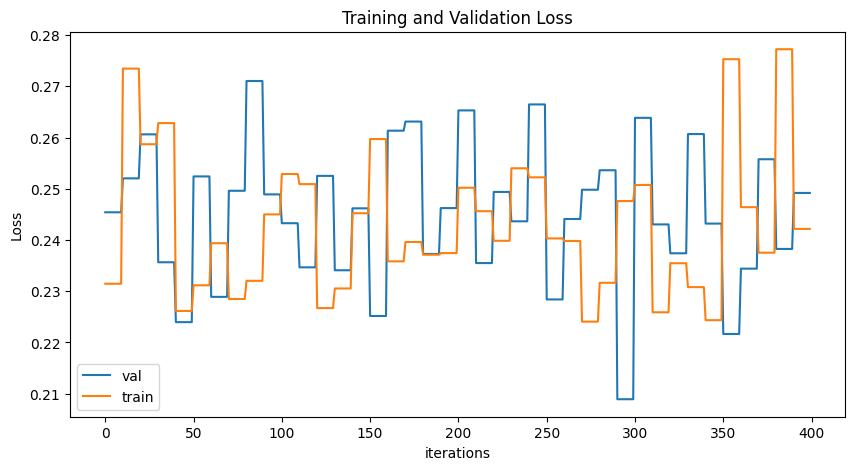

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss")
plt.plot(val_losses,label="val")
plt.plot(train_losses,label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
d = torch.save(model, 'nanogpt.pth')

In [ ]:
torch.save(model, 'nanogpt_model.pth')

In [ ]:
idx = torch.zeros((1,1), dtype = torch.long, device = device)
k = model.generate(idx, max_new_tokens = 1200)[0].tolist()
text  = decoder(k)
print(text)


### Intruction:
 what mave it.
### Response:
 leard, ban, unnd you ---
### Intruction:
 ..
### Response:
 do.
### Intruction:
 sw yon back.
### Response:
 you uh.
### Intruction:
 one not lal you?
### Response:
 i dain yoursatat.
### Intruction:
 am afistls sorly. my thisct  gut to be you.   i was strietaver. can.
### Response:
 i what its say thanke esexid spectand thak ivived . hours.  you dre ajigb.
### Intruction:
 i have than mike. i am not on in yover mistery.  do not had aborgish ut i mel can.
### Response:
 look shot bellife your you are than be wound of in a are ag eea t taskn peand an mapl an barnd kinght ----ecreat.
### Intruction:
  fariest..
### Response:
 i was manoted you are awants biger are part?  i bees is ar it a twallt lastedina -shay. dat not thengred of theme is spisind themim o knf.
### Response:
 you do not t allking . teshangs, if jume.
### Intruction:
 when was the spbraid.
### Response:
 a a it ellt, -, i woh imare nthiss naren.
### Intruction:
 chall?
### R

In [ ]:
# Generate the answer using the model
ques = 'what is your name ?'
input_ids = torch.tensor([encoder(f'### Intruction:\n bye \n')]).to(device)
sample_output = model.generate(input_ids, max_new_tokens = 40)[0].tolist()

# Decode the generated answer using the tokenizer
answer = decoder(sample_output)
# print(answer)
# Split the generated answer into individual sentences
sentences = answer.split('. ')

# Look for the sentence that contains the answer to the question
for sentence in sentences:
    if ques in sentence:
        print(sentence)

# If no sentence contains the answer, return the full generated answer
print(answer)

### Intruction:
 bye 
### Response:
 and she pup in  with is d
